    This notebook is used to demonstrate the data exploration and model analysis for sample loan data
    

Populating the interactive namespace from numpy and matplotlib


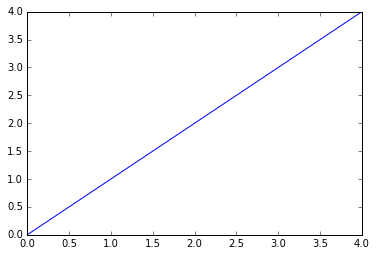

In [3]:
%pylab inline
plot(arange(5)) # test the environment

After importing the library, you read the dataset using function read_csv(). This is how the code looks like till this stage:

In [10]:
import pandas as pd
import numpy as np
import matplotlib as plt

df = pd.read_csv("C:\DF2.0\python\Loan_dataset\loan_data_set_train.csv") #Reading the dataset in a dataframe using Pandas

Quick Data Exploration

Once you have read the dataset, you can have a look at few top rows by using the function head()

In [11]:
df.head(10) # list the 10 records

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0,NaN,360,1,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508,128,360,1,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0,66,360,1,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358,120,360,1,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0,141,360,1,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196,267,360,1,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516,95,360,1,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504,158,360,0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526,168,360,1,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968,349,360,1,Semiurban,N


Explore the summary of numerical fields by using describe() function

In [12]:
df.describe() # Get the summary of numerical variables

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


Here are a few inferences, you can draw by looking at the output of describe() function:

LoanAmount has (614 – 592) 22 missing values.
Loan_Amount_Term has (614 – 600) 14 missing values.
Credit_History has (614 – 564) 50 missing values.
We can also look that about 84% applicants have a credit_history. How? The mean of Credit_History field is 0.84 (Remember, Credit_History has value 1 for those who have a credit history and 0 otherwise)
The ApplicantIncome distribution seems to be in line with expectation. Same with CoapplicantIncome
Please note that we can get an idea of a possible skew in the data by comparing the mean to the median, i.e. the 50% figure.

For the non-numerical values (e.g. Property_Area, Credit_History etc.), we can look at frequency distribution to understand whether they make sense or not. The frequency table can be printed by following command:

In [13]:
df['Property_Area'].value_counts() # get the frequency table

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

Distribution analysis

Now that we are familiar with basic data characteristics, let us study distribution of various variables. Let us start with numeric variables – namely ApplicantIncome and LoanAmount

Plot the histogram of ApplicantIncome using the following commands:

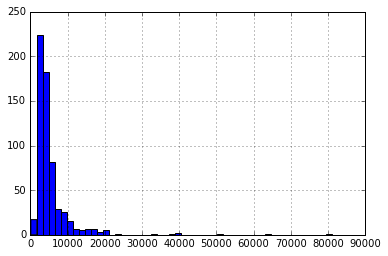

In [14]:
df['ApplicantIncome'].hist(bins=50) #50 bins are required to depict the distribution clearly

Next, we look at box plots to understand the distributions. Box plot for fare can be plotted by:

C:\Users\dghosal1\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  if __name__ == '__main__':


{'boxes': [<matplotlib.lines.Line2D at 0xa947278>],
 'caps': [<matplotlib.lines.Line2D at 0xa94ecf8>,
 'fliers': [<matplotlib.lines.Line2D at 0xa953da0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0xa953668>],
 'whiskers': [<matplotlib.lines.Line2D at 0xa947c88>,
  <matplotlib.lines.Line2D at 0xa947da0>]}

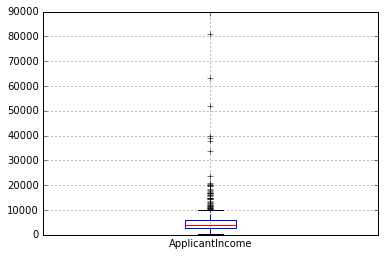

In [17]:
df.boxplot(column='ApplicantIncome')

This confirms the presence of a lot of outliers/extreme values. This can be attributed to the income disparity in the society. Part of this can be driven by the fact that we are looking at people with different education levels.

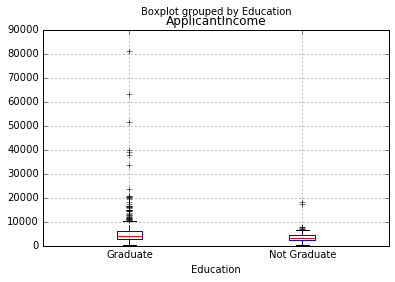

In [18]:
df.boxplot(column='ApplicantIncome', by = 'Education') # segregate them by Education:

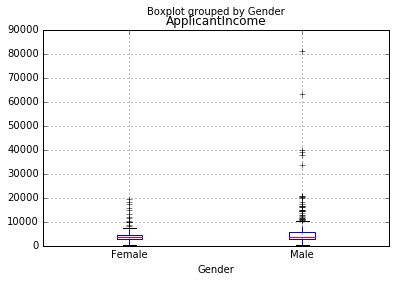

In [19]:
df.boxplot(column='ApplicantIncome', by = 'Gender') # segregate them by Gender:

We can see that there is no substantial different between the mean income of graduate and non-graduates. But there are a higher number of graduates with very high incomes, which are appearing to be the outliers.

 Let’s look at the histogram and boxplot of LoanAmount

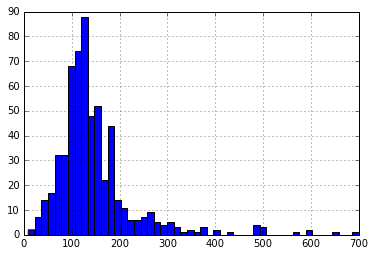

In [22]:
df['LoanAmount'].hist(bins=50)

C:\Users\dghosal1\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  if __name__ == '__main__':


{'boxes': [<matplotlib.lines.Line2D at 0xae19470>],
 'caps': [<matplotlib.lines.Line2D at 0xae1eeb8>,
 'fliers': [<matplotlib.lines.Line2D at 0xae24f60>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0xae24828>],
 'whiskers': [<matplotlib.lines.Line2D at 0xae19e80>,
  <matplotlib.lines.Line2D at 0xae19f98>]}

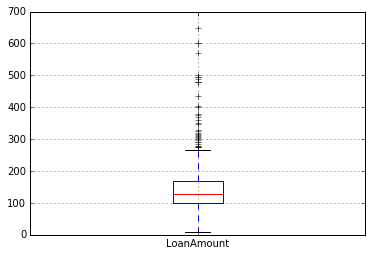

In [23]:
df.boxplot(column='LoanAmount')

Again, there are some extreme values. Clearly, both ApplicantIncome and LoanAmount require some amount of data munging. LoanAmount has missing and well as extreme values values, while ApplicantIncome has a few extreme values, which demand deeper understanding. 